# Word2vec bias #

In [1]:
import gensim

# Load pretrained model (since intermediate data is not included, the model cannot be refined with additional data)
# I used this version: http://academictorrents.com/details/2aa0d0c6aff92f08719e409db04ecee4721cf21f
# Note: loading the embeddings takes around 10 minutes, and I recommend you to have at least 8 GB of ram. 
filepath = 'C:/Users/emmag/Downloads/GoogleNews-vectors-negative300.bin.gz'
model = gensim.models.KeyedVectors.load_word2vec_format(filepath, binary=True)

# Using Memory Mapped files leads to significantly better performance, so save and reload:
# model.save('GN-vectors.bin')

# Load the wordvectors using memory mapped files:

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

#glove_file = datapath('C:/Users/emmag/Documents/PhD/Programming/Informagi/copd-w2v/notebooks/glove.6B.300d.txt')
#tmp_file = get_tmpfile("test_word2vec.txt")

#_ = glove2word2vec(glove_file, tmp_file)
#model = KeyedVectors.load_word2vec_format(tmp_file)

# model = gensim.models.KeyedVectors.load('GN-vectors.bin', mmap='r')

C:\Users\emmag\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
# Using Memory Mapped files leads to significantly better performance, so save and reload:
#model.save('GN-vectors.bin')

# Load the wordvectors using memory mapped files:
#model = gensim.models.KeyedVectors.load('GN-vectors.bin', mmap='r')

In [2]:
import os
os.getcwd()

'C:\\Users\\emmag\\Documents\\PhD\\Programming\\Informagi\\copd-w2v\\notebooks'

In [2]:
def wordrank(word):
    N = 3*10**6
    return N- model.wv.vocab[word].count

In [52]:
wordrank('pizzas')

C:\Users\emmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


28669

In [103]:
model['computer_programmer'].std()

0.21182883

In [194]:
len(model.wv.index2entity)

C:\Users\emmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


3000000

In [136]:
file = open('w2v_vocabulary.txt','w', encoding="utf-8") 
for word in model.wv.index2entity:
    file.write(word + "\r\n")
file.close()

C:\Users\emmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [176]:
import math
math.log(5)

1.6094379124341003

In [195]:
K = len(model.wv.index2entity)
common_words = model.wv.index2entity[:K]

import scipy
stds = []
np.ones(300)/300
for word in common_words:
    stds.append(model[word].var())
    #stds.append(sum(model[word]))


C:\Users\emmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
C:\Users\emmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [196]:
normalized_index = [math.log(k+1) for k in range(K)]

In [199]:
log_stds = [math.log(k) for k in stds]

In [189]:
normalized_index

[0.0,
 0.6931471805599453,
 1.0986122886681098,
 1.3862943611198906,
 1.6094379124341003,
 1.791759469228055,
 1.9459101490553132,
 2.0794415416798357,
 2.1972245773362196,
 2.302585092994046,
 2.3978952727983707,
 2.4849066497880004,
 2.5649493574615367,
 2.6390573296152584,
 2.70805020110221,
 2.772588722239781,
 2.833213344056216,
 2.8903717578961645,
 2.9444389791664403,
 2.995732273553991,
 3.044522437723423,
 3.091042453358316,
 3.1354942159291497,
 3.1780538303479458,
 3.2188758248682006,
 3.258096538021482,
 3.295836866004329,
 3.332204510175204,
 3.367295829986474,
 3.4011973816621555,
 3.4339872044851463,
 3.4657359027997265,
 3.4965075614664802,
 3.5263605246161616,
 3.5553480614894135,
 3.58351893845611,
 3.6109179126442243,
 3.6375861597263857,
 3.6635616461296463,
 3.6888794541139363,
 3.713572066704308,
 3.7376696182833684,
 3.7612001156935624,
 3.784189633918261,
 3.8066624897703196,
 3.828641396489095,
 3.8501476017100584,
 3.871201010907891,
 3.8918202981106265,
 3.91

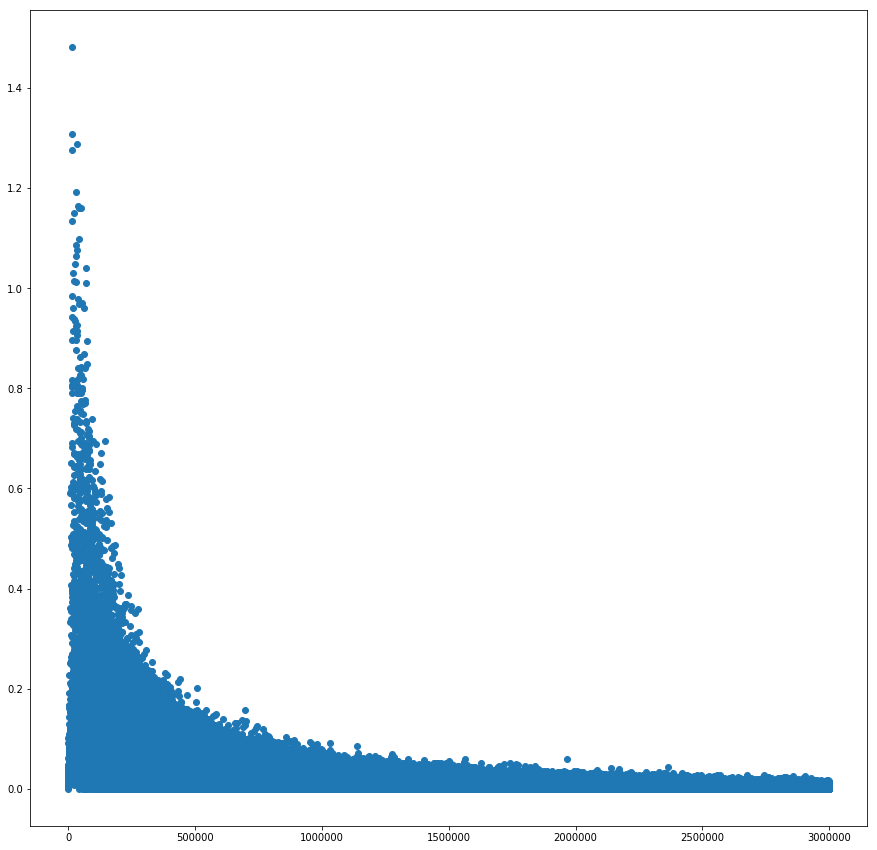

In [214]:
plt.plot(range(K), stds, 'o')

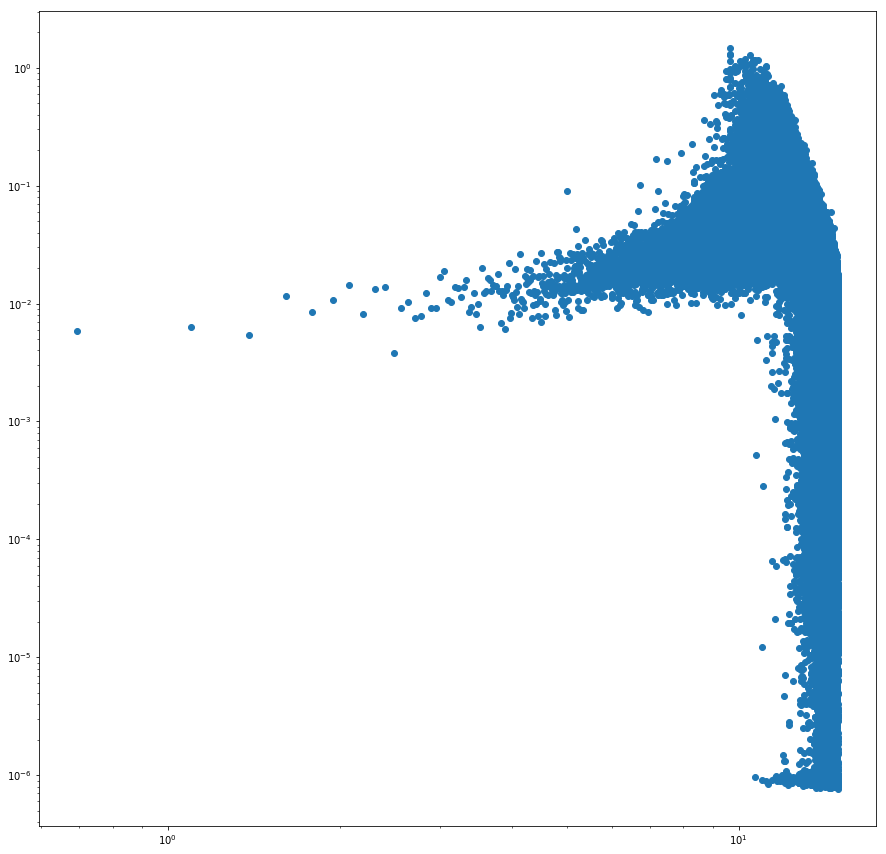

In [215]:
fig = plt.figure()
ax = fig.gca()
ax.plot(normalized_index, stds, 'o')
ax.set_xscale("log")
ax.set_yscale("log")

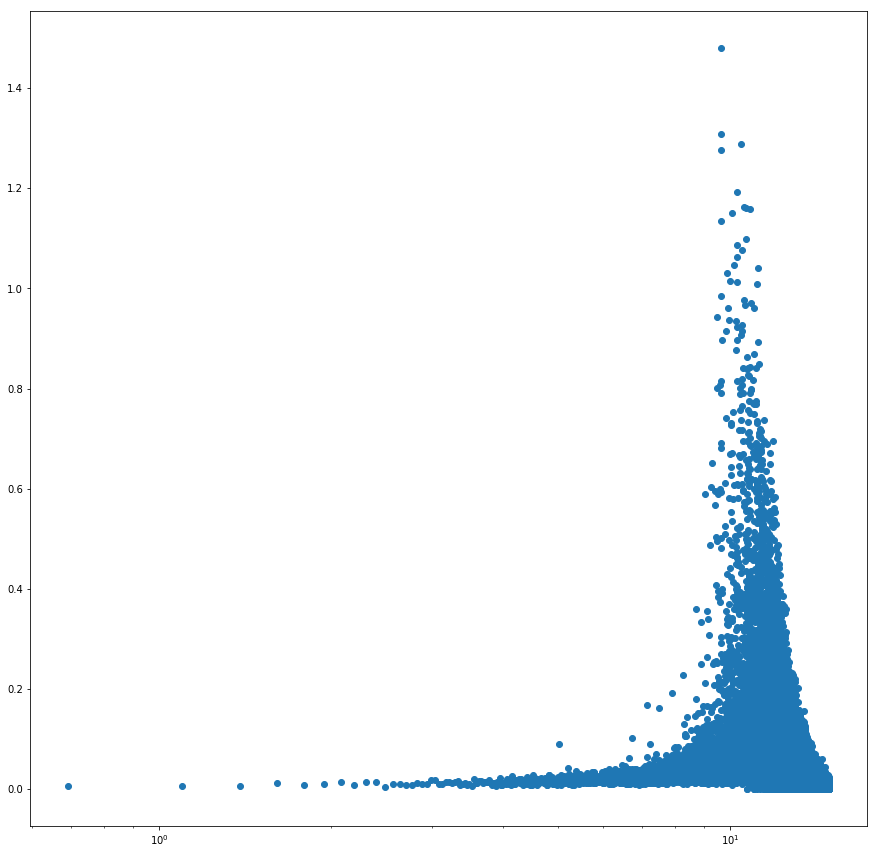

In [217]:
fig = plt.figure()
ax = fig.gca()
ax.plot(normalized_index, stds, 'o')
ax.set_xscale("log")
ax.set_yscale("linear")

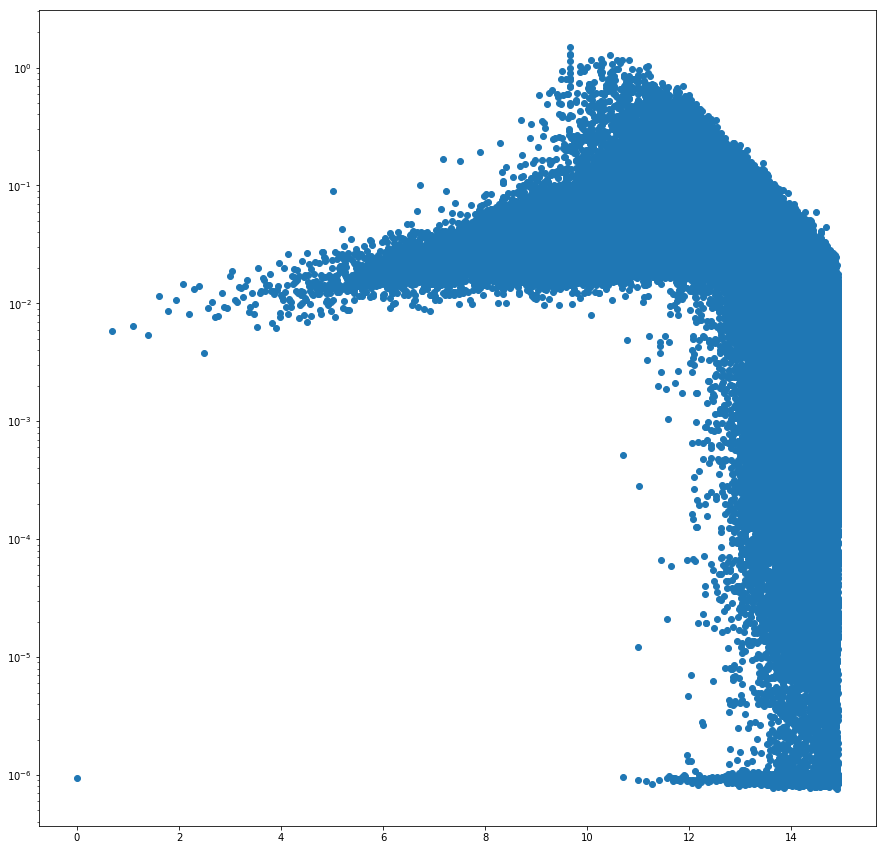

In [221]:
fig = plt.figure()
ax = fig.gca()
ax.plot(normalized_index, stds, 'o')
ax.set_xscale("linear")
ax.set_yscale("log")

First, let us look at the standard examples:

In [3]:
print("Most similar to programmer - he + she: \n",model.most_similar(positive = ['nurse', 'she'], negative = ['he'], topn = 5))
print("Most similar to beautician - she + he: \n", model.most_similar(positive = ['nurse', 'he'], negative = ['she'], topn = 5))


C:\Users\emmag\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Most similar to programmer - he + she: 
 [('registered_nurse', 0.7028000354766846), ('nurse_practitioner', 0.6314353942871094), ('midwife', 0.620543360710144), ('nurses', 0.606627345085144), ('certified_lactation_counselor', 0.5820688009262085)]
Most similar to beautician - she + he: 
 [('doctor', 0.5559605360031128), ('medic', 0.5425376892089844), ('physician', 0.5394271016120911), ('x_ray_technician', 0.5355567932128906), ('surgeon', 0.5160146355628967)]


However, other examples seem to be less shocking:

In [63]:
print("Most similar to programmer - he + she: \n", model.most_similar(positive = ['doctor', 'she'], negative = ['he'], topn = 5))


Most similar to programmer - he + she: 
 [('nurse', 0.6126464009284973), ('her', 0.5682146549224854), ('woman', 0.5516616106033325), ('mother', 0.5454018712043762), ('doctors', 0.5222687721252441)]


C:\Users\emmag\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [3]:
def most_similar(positive_1, positive_2, negative_1, n = 1):
    vector = model[positive_1] - model[negative_1] + model[positive_2]
    return(model.similar_by_vector(vector, topn = n))
    

In [4]:
model.similar_by_vector(model['nurse'], topn = 20)

C:\Users\emmag\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('nurse', 1.0),
 ('registered_nurse', 0.7907711267471313),
 ('nurses', 0.738167405128479),
 ('nurse_practitioner', 0.6993104219436646),
 ('midwife', 0.6727652549743652),
 ('respiratory_therapist', 0.6620449423789978),
 ('Nurse', 0.6428854465484619),
 ('nursing', 0.6424654722213745),
 ('doctor', 0.6319522857666016),
 ('neonatal_nurse', 0.6193330883979797),
 ('x_ray_technician', 0.6126093864440918),
 ('radiology_technician', 0.611963152885437),
 ('psychiatric_nurse', 0.6028209924697876),
 ('nurse_practioner', 0.5949011445045471),
 ('nurse_midwife', 0.5938222408294678),
 ('medic', 0.5933952927589417),
 ('Registered_Nurse', 0.5901102423667908),
 ('radiographer', 0.5822948217391968),
 ('dental_hygienist', 0.5819463729858398),
 ('phlebotomist', 0.5811198353767395)]

In [500]:
most_similar('nurse', 'he', 'she', n = 5)

C:\Users\emmag\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('nurse', 0.8236403465270996),
 ('nurses', 0.6188654899597168),
 ('doctor', 0.605577826499939),
 ('registered_nurse', 0.5986157655715942),
 ('physician', 0.5919315814971924)]

Next, we wonder if these analogies hold both ways. If _computer programmer - he + she = homemaker_, does the reverse also hold? What is the result of _homemaker - she + he_ ? 

In [2]:
def analogy_convergence(biassed_word, fromword = 'he', toword = 'she', N = 10):
    firstfrom = fromword
    firstto = toword
    biassed_from = biassed_word
    biassed_to = ""
    for i in range(N):
        analogy = model.most_similar(positive = [biassed_from, toword], negative = [fromword], topn = 1)[0][0]
        #analogy = most_similar(biassed_from, toword, fromword, n = 1)[0][0]
        print(biassed_from, " - ", fromword, " + ", toword, " = ", analogy)
        if analogy == biassed_to or analogy == biassed_from:
            break
        else:
            biassed_to = biassed_from
            biassed_from = analogy
            if i%2 == 0:
                fromword = firstto
                toword = firstfrom
            else:
                fromword = firstfrom
                toword = firstto
    if i == N:
        print("Convergence not reached within ", N, " steps")
        

In [3]:
analogy_convergence('programmer', 'he', 'she')

C:\Users\emmag\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


programmer  -  he  +  she  =  programmers
programmers  -  she  +  he  =  Martin_Thorborg_together
Martin_Thorborg_together  -  he  +  she  =  Henrik_Sørensen
Henrik_Sørensen  -  she  +  he  =  Martin_Thorborg_together


In [4]:
analogy_convergence('pizzas', 'he', 'she')

C:\Users\emmag\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


pizzas  -  he  +  she  =  cupcakes
cupcakes  -  she  +  he  =  waffles
waffles  -  he  +  she  =  cupcakes


In [7]:
analogy_convergence('pizzas', 'he', 'she')

C:\Users\emmag\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


pizzas  -  he  +  she  =  cupcakes
cupcakes  -  she  +  he  =  waffles
waffles  -  he  +  she  =  cupcakes


We know about the analogies, but what are the actual similarities between the words?

In [8]:
from scipy import spatial
def word_sim(word1, word2):
    similarity = round(1-spatial.distance.cosine(model[word1], model[word2]),2)
    print("Similarity between ", word1, " and ", word2, ":", similarity)

In [10]:

word_sim('he', 'engineer')
word_sim('she', 'engineer')
word_sim('homemaker', 'she')
word_sim('homemaker', 'he')
word_sim('he', 'she')

Similarity between  he  and  engineer : 0.11
Similarity between  she  and  engineer : 0.0
Similarity between  homemaker  and  she : 0.4
Similarity between  homemaker  and  he : 0.13
Similarity between  he  and  she : 0.61


In [13]:
import numpy as np
def word_projection(word, mode = 'inner'):
    if mode == 'inner':
        return round(np.inner(model['she']-model['he'], model[word]),2)
    elif mode == 'cosine':
        return round(spatial.distance.cosine(model['he'], model[word]) - spatial.distance.cosine(model['she'], model[word]),2)

word_projection('loser')

-0.01

In [18]:
np.linalg.norm(model['he']-model['she'])

1.775429

Note that 'she' is closer to 'computer_programmer' than 'he' is!

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt

def words_pca(word_list, transform = 'pca'):
    # Looking up the vectors per word
    bias_vectors = [model[word] for word in word_list]
    # scaling the wordvectors
    bias_vectors = StandardScaler().fit_transform(bias_vectors)
    # applying PCA with 2 components
    if transform == 'pca':
        pca = PCA(n_components=2)
        bias_pca = pca.fit_transform(bias_vectors)
    elif transform == 'tsne':
        bias_pca = TSNE(n_components=2).fit_transform(bias_vectors)
    else:
        bias_pca = umap.UMAP().fit_transform(bias_vectors)
    return bias_pca
    

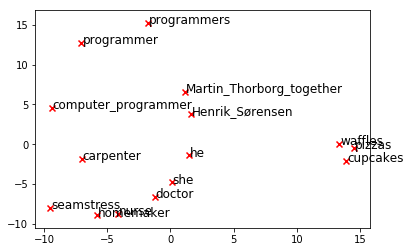

In [11]:
convergence_words = ['carpenter', 'seamstress', 'programmer', 'computer_programmer', 'homemaker', 
                     'programmers', 'doctor', 'nurse', 'pizzas', 'cupcakes', 'waffles', 'Martin_Thorborg_together', 'Henrik_Sørensen', 'he', 'she']

convergence_pca = words_pca(convergence_words, transform = 'pca')

# Plotting the PCA with words

for i,word in enumerate(convergence_words):
    x = convergence_pca[i,0]
    y = convergence_pca[i,1]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.1, y-0.1, word, fontsize=12)
plt.show()


In the Bolukbasi et al. paper, they list the following words as most biased in gender. You can optionally add a list of super gendered words by uncommenting  the line after 'optional, add gendered words'. This is to push 'gender' as the principal component. 

In [21]:
super_gendered = ['king', 'queen', 'brother', 'sister', 'mother', 'father',
                  'she', 'woman', 'he', 'man', 'grandpa', 'grandma', 'boy', 'girl',
                 'her', 'his', 'daughter', 'son', 'Mary', 'John']
super_gendered = check_in_word2vec(super_gendered)

In [103]:
# setting the plotsize
plt.rcParams['figure.figsize'] = [12, 6.25]
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

First to see how gendered word embeddings are, we make plot the vectors. Since 300-dimensional plots are not very intuitive for humans, we need to reduce the dimensionality to two dimensions. There are multiple ways to do this, such as PCA, TSNE and UMAP. First we look at the words which the authors describe as being biassed.

C:\Users\emmag\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


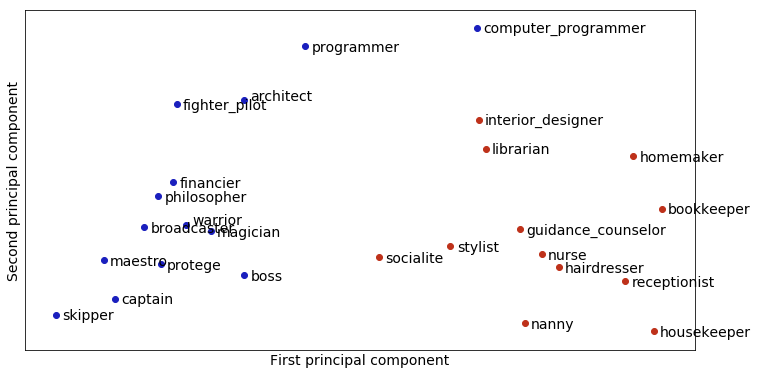

In [115]:
# list of biased words, without the genderwords:
male_bias =  ['maestro', 'skipper', 'protege', 'philosopher', 'captain', 'architect','financier', 'warrior', 'broadcaster','magician', 'fighter_pilot', 'boss', 'computer_programmer', 'programmer']
female_bias = ['homemaker', 'nurse', 'receptionist', 'librarian', 'socialite', 'hairdresser', 'nanny', 'bookkeeper', 'stylist','housekeeper', 'interior_designer', 'guidance_counselor']
bias_words = male_bias + female_bias

# Optional: add gendered words:
#bias_words = bias_words + super_gendered

# Calculating the bias
# Options for dimensionality reduction: pca, tsne and umap
bias_pca = words_pca(bias_words, transform = 'pca')


# Plotting the PCA with words
f = plt.figure()

some_words = ['homemaker', 'nurse', 'receptionist', 'librarian']
for i,word in enumerate(bias_words):
    x = bias_pca[i,0]
    y = bias_pca[i,1]
    if word in female_bias:
        plt.scatter(x, y, marker='o',  color='#BE311A')
        plt.text(x+0.2, y-0.3, word, fontsize=14)
    elif word in male_bias:
        plt.scatter(x, y, marker='o', color='#1A1fBE')
        if word in ["warrior", "architect"]:
            plt.text(x+0.2, y, word, fontsize=14)
        else:
            plt.text(x+0.2, y-0.3, word, fontsize=14)
        
    elif word in super_gendered:
        plt.scatter(x, y, marker='o', color='green')
        plt.text(x+0.1, y-0.1, word, fontsize=12)
    else:
        plt.scatter(x, y, marker='o', color='black')
        plt.text(x+0.1, y-0.1, word, fontsize=12)
        
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.xticks([])
plt.yticks([])


plt.show()

In [116]:
f.savefig("C:/Users/emmag/Documents/PhD/FDIA2019/Poster/PCA_different_professions_filled_poster.pdf", bbox_inches='tight')

C:\Users\emmag\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [106]:
bias_words = ["accountant", "acquaintance", "actor", "actress","adjunct_professor", "administrator", "adventurer", "advocate","aide","alderman", "alter_ego", "ambassador", "analyst", "anthropologist", "archaeologist", "archbishop", "architect", "artist","artiste", "assassin", "assistant_professor", "associate_dean", "associate_professor", "astronaut", "astronomer", "athlete", "athletic_director", "attorney", "author", "baker","ballerina", "ballplayer", "banker", "barber", "baron", "barrister", "bartender", "biologist", "bishop", "bodyguard", "bookkeeper","boss", "boxer", "broadcaster","broker", "bureaucrat", "businessman", "businesswoman", "butcher", "butler", "cab_driver", "cabbie", "cameraman", "campaigner", "captain", "cardiologist", "caretaker","carpenter", "cartoonist", "cellist","chancellor", "chaplain", "character", "chef", "chemist", "choreographer", "cinematographer", "citizen", "civil_servant", "cleric", "clerk","coach", "collector", "colonel", "columnist", "comedian", "comic", "commander", "commentator", "commissioner", "composer", "conductor", "confesses", "congressman", "constable", "consultant", "cop", "correspondent", "councilman", "councilor", "counselor","critic", "crooner", "crusader", "curator","custodian", "dad", "dancer", "dean", "dentist", "deputy", "dermatologist","detective", "diplomat", "director", "disc_jockey", "doctor", "doctoral_student", "drug_addict", "drummer", "economics_professor", "economist", "editor", "educator","electrician", "employee", "entertainer", "entrepreneur", "environmentalist","envoy", "epidemiologist", "evangelist", "farmer", "fashion_designer", "fighter_pilot", "filmmaker", "financier", "firebrand", "firefighter", "fireman", "fisherman", "footballer", "foreman", "freelance_writer", "gangster", "gardener","geologist", "goalkeeper", "graphic_designer", "guidance_counselor", "guitarist", "hairdresser", "handyman", "headmaster", "historian", "hitman", "homemaker", "hooker", "housekeeper", "housewife","illustrator", "industrialist", "infielder", "inspector", "instructor","interior_designer", "inventor", "investigator", "investment_banker", "janitor", "jeweler", "journalist","judge", "jurist", "laborer", "landlord", "lawmaker", "lawyer", "lecturer", "legislator", "librarian", "lieutenant", "lifeguard", "lyricist","maestro", "magician", "magistrate", "maid", "major_leaguer", "manager", "marksman", "marshal", "mathematician", "mechanic", "mediator","medic", "midfielder", "minister", "missionary", "mobster", "monk", "musician", "nanny", "narrator", "naturalist","negotiator", "neurologist", "neurosurgeon", "novelist", "nun", "nurse", "observer","officer", "organist", "painter", "paralegal", "parishioner", "parliamentarian", "pastor", "pathologist", "patrolman", "pediatrician","performer","pharmacist", "philanthropist", "philosopher", "photographer","photojournalist", "physician", "physicist", "pianist","planner","plastic_surgeon", "playwright", "plumber", "poet","policeman", "politician", "pollster", "preacher", "president", "priest", "principal", "prisoner", "professor", "professor_emeritus", "programmer", "promoter", "proprietor", "prosecutor","protagonist", "protege", "protester","provost", "psychiatrist","psychologist", "publicist", "pundit", "rabbi", "radiologist","ranger", "realtor", "receptionist", "registered_nurse", "researcher", "restaurateur", "sailor", "saint", "salesman", "saxophonist", "scholar", "scientist", "screenwriter", "sculptor", "secretary", "senator", "sergeant", "servant", "serviceman", "sheriff_deputy", "shopkeeper", "singer","singer_songwriter","skipper", "socialite", "sociologist","soft_spoken", "soldier", "solicitor", "solicitor_general", "soloist", "sportsman", "sportswriter", "statesman", "steward","stockbroker", "strategist", "student", "stylist", "substitute", "superintendent", "surgeon", "surveyor", "swimmer", "taxi_driver", "teacher","technician", "teenager","therapist", "trader", "treasurer","trooper", "trucker", "trumpeter", "tutor","tycoon", "undersecretary","understudy", "valedictorian", "vice_chancellor", "violinist", "vocalist","waiter", "waitress", "warden", "warrior", "welder", "worker", "wrestler", "writer"]

very_bias_words = []
male_bias = []
female_bias = []
female_or_male = []

female_cosine = []
male_cosine = []
gender_neutral = []

for word in bias_words:
    tresh = 0.0
    if abs(word_projection(word, mode = 'cosine')) >= tresh:
        very_bias_words.append(word)
        if word_projection(word, mode = 'cosine') > tresh:
            female_bias.append(word)
            female_or_male.append(1)
            female_cosine.append(abs(word_projection(word, mode = 'cosine')))
        elif word_projection(word, mode = 'cosine') < tresh:
            male_bias.append(word)
            female_or_male.append(-1)
            male_cosine.append(abs(word_projection(word, mode = 'cosine')))
        else:
            female_or_male.append(0)
            gender_neutral.append(word)

            
sorted(list(zip(female_bias, female_cosine)), key = lambda x: x[1], reverse = True)


[('businesswoman', 0.32),
 ('actress', 0.31),
 ('housewife', 0.3),
 ('homemaker', 0.27),
 ('registered_nurse', 0.27),
 ('nurse', 0.25),
 ('receptionist', 0.24),
 ('waitress', 0.24),
 ('librarian', 0.23),
 ('socialite', 0.23),
 ('ballerina', 0.22),
 ('hairdresser', 0.22),
 ('nanny', 0.22),
 ('paralegal', 0.22),
 ('maid', 0.21),
 ('nun', 0.21),
 ('bookkeeper', 0.2),
 ('stylist', 0.19),
 ('housekeeper', 0.18),
 ('interior_designer', 0.17),
 ('fashion_designer', 0.16),
 ('guidance_counselor', 0.16),
 ('dancer', 0.15),
 ('clerk', 0.14),
 ('educator', 0.13),
 ('pediatrician', 0.13),
 ('singer', 0.13),
 ('swimmer', 0.13),
 ('therapist', 0.13),
 ('counselor', 0.12),
 ('dermatologist', 0.12),
 ('graphic_designer', 0.12),
 ('publicist', 0.12),
 ('student', 0.12),
 ('teacher', 0.12),
 ('valedictorian', 0.11),
 ('vocalist', 0.11),
 ('singer_songwriter', 0.1),
 ('worker', 0.1),
 ('assistant_professor', 0.09),
 ('choreographer', 0.09),
 ('doctoral_student', 0.09),
 ('pharmacist', 0.09),
 ('soloist',

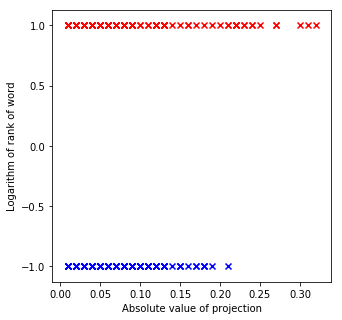

(0.15396775433031676, 0.00744840314353857)

In [421]:
import math
import random

bias_word_projection = [abs(word_projection(word, mode = 'cosine')) for word in very_bias_words]

#bias_word_frequency = [(wordrank(word)) for word in very_bias_words]
#bias_word_frequency = [np.linalg.norm(model[word]) for word in very_bias_words]
bias_word_frequency = female_or_male
f = plt.figure()
for i,word in enumerate(very_bias_words):
    x = bias_word_projection[i]
    y = bias_word_frequency[i]
    if word in female_bias:
        plt.scatter(x, y, marker='x', color='red')
        if np.random.rand()>1:
            plt.text(x, y, word, fontsize=12)
    elif word in male_bias:
        plt.scatter(x, y, marker='x', color='blue')
        if np.random.rand()>1:
            plt.text(x, y, word, fontsize=12)
    elif word in super_gendered:
        plt.scatter(x, y, marker='x', color='green')
        if bool(random.getrandbits(1)):
            plt.text(x, y, word, fontsize=12)
    else:
        plt.scatter(x, y, marker='x', color='black')
        plt.text(x, y, word, fontsize=12)


plt.xlabel('Absolute value of projection')
plt.ylabel('Logarithm of rank of word')
plt.show()
import scipy

scipy.stats.pearsonr(bias_word_projection, bias_word_frequency)

C:\Users\emmag\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


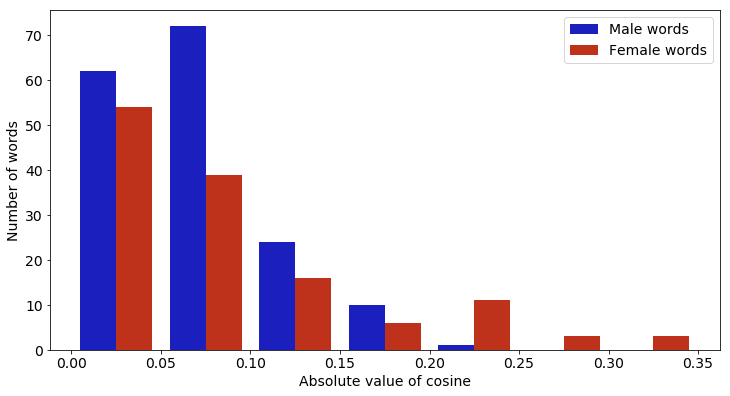

In [104]:
#bias_word_projection = [abs(word_projection(word, mode = 'cosine')) for word in very_bias_words]

bins = np.linspace(0, 0.35, 8)
x = male_cosine
y = female_cosine

f = plt.figure()
plt.hist([x, y], bins, label=['Male words', 'Female words'], color = ['#1A1fBE', '#BE311A'])
plt.legend(loc='upper right')
plt.xlabel('Absolute value of cosine')
plt.ylabel('Number of words')
plt.show()

In [105]:
f.savefig("C:/Users/emmag/Documents/PhD/FDIA2019/Poster/cosine_histogram_poster.pdf", bbox_inches='tight')

C:\Users\emmag\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


C:\Users\emmag\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


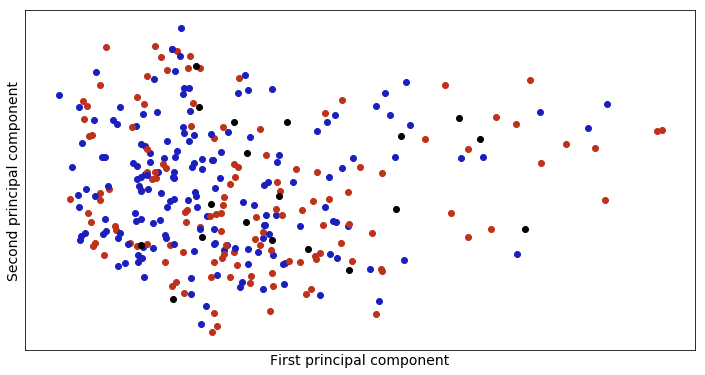

In [107]:
# Calculating the bias
# Options for dimensionality reduction: pca, tsne and umap
bias_pca = words_pca(bias_words, transform = 'pca')


# Plotting the PCA with words
f = plt.figure()

some_words = ['homemaker', 'nurse', 'receptionist', 'librarian']
for i,word in enumerate(bias_words):
    x = bias_pca[i,0]
    y = bias_pca[i,1]
    if word in female_bias:
        plt.scatter(x, y, marker='o', color='#BE311A')
    elif word in male_bias:
        plt.scatter(x, y, marker='o', color='#1A1fBE')
    elif word in super_gendered:
        plt.scatter(x, y, marker='o', color='green')
    else:
        plt.scatter(x, y, marker='o', color='black')
        
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.xticks([])
plt.yticks([])


plt.show()

In [84]:
f.savefig("C:/Users/emmag/Documents/PhD/FDIA2019/Poster/PCA_different_professions_poster.pdf", bbox_inches='tight')

C:\Users\emmag\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [384]:
bias_words = ['accountant', 'actor', 'actress', 'architect', 'astronomer', 'author', 'baker', 'bricklayer', 
              'butcher', 'carpenter', 'chef', 'cook', 'cleaner', 'dentist', 'designer',
             'doctor', 'dustman', 'electrician', 'engineer',
             'farmer', 'fireman', 'firefighter', 'fisherman', 'florist', 'gardener', 'hairdresser',
             'journalist', 'judge', 'lawyer', 'lecturer', 'librarian', 'lifeguard', 'mechanic',
             'model', 'newsreader', 'nurse', 'optician', 'painter', 'pharmacist', 'photographer',
             'pilot', 'plumber', 'politician', 'policeman', 'policewoman', 'postman', 
             'receptionist', 'scientist', 'secretary', 'soldier', 'tailor', 'taxi_driver',
             'teacher', 'translator', 'vet', 'waiter', 'waitress',
             'window_washer', 'computer_programmer', 'homemaker']
very_bias_words = []
male_bias = []
female_bias = []
female_or_male = []
for word in bias_words:
    tresh = 0.0
    if abs(word_projection(word, mode = 'cosine')) > tresh:
        very_bias_words.append(word)
        if word_projection(word, mode = 'cosine') > tresh:
            female_bias.append(word)
            female_or_male.append(0)
        else:
            male_bias.append(word)
            female_or_male.append(-1)
            
        
very_bias_words

['accountant',
 'actor',
 'actress',
 'architect',
 'astronomer',
 'author',
 'baker',
 'bricklayer',
 'butcher',
 'carpenter',
 'chef',
 'cook',
 'cleaner',
 'dentist',
 'designer',
 'dustman',
 'electrician',
 'engineer',
 'farmer',
 'fireman',
 'fisherman',
 'florist',
 'gardener',
 'hairdresser',
 'judge',
 'lawyer',
 'lecturer',
 'librarian',
 'lifeguard',
 'mechanic',
 'model',
 'newsreader',
 'nurse',
 'optician',
 'painter',
 'pharmacist',
 'photographer',
 'pilot',
 'plumber',
 'politician',
 'policeman',
 'policewoman',
 'postman',
 'receptionist',
 'secretary',
 'soldier',
 'tailor',
 'taxi_driver',
 'teacher',
 'translator',
 'vet',
 'waiter',
 'waitress',
 'computer_programmer',
 'homemaker']

Now we also look at a list of professions, took from the following website: https://www.vocabulary.cl/Basic/Professions.htm

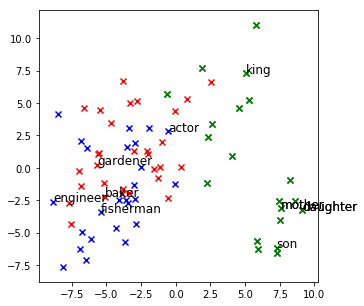

In [386]:
# List of random professions I got online, with some extra gender words
# setting the plotsize
plt.rcParams['figure.figsize'] = [5, 5]
bias_words = ['accountant', 'actor', 'actress', 'architect', 'astronomer', 'author', 'baker', 'bricklayer', 
              'butcher', 'carpenter', 'chef', 'cook', 'cleaner', 'dentist', 'designer',
             'doctor', 'dustman', 'electrician', 'engineer',
             'farmer', 'fireman', 'firefighter', 'fisherman', 'florist', 'gardener', 'hairdresser',
             'journalist', 'judge', 'lawyer', 'lecturer', 'librarian', 'lifeguard', 'mechanic',
             'model', 'newsreader', 'nurse', 'optician', 'painter', 'pharmacist', 'photographer',
             'pilot', 'plumber', 'politician', 'policeman', 'policewoman', 'postman', 
             'receptionist', 'scientist', 'secretary', 'soldier', 'tailor', 'taxi_driver',
             'teacher', 'translator', 'vet', 'waiter', 'waitress',
             'window_washer', 'computer_programmer', 'homemaker']
bias_words = check_in_word2vec(bias_words)
# Optional: add gendered words:
very_bias_words = very_bias_words + super_gendered

# Calculating the bias
bias_pca = words_pca(very_bias_words, transform = 'pca')

# Plotting the PCA with words
f = plt.figure()

for i,word in enumerate(very_bias_words):
    x = bias_pca[i,0]
    y = bias_pca[i,1]
    tresh = 0.9
    fontsz = 12
    if word in female_bias:
        plt.scatter(x, y, marker='x', color='red')
        if np.random.rand()>tresh:
            plt.text(x, y, word, fontsize=fontsz)
    elif word in male_bias:
        plt.scatter(x, y, marker='x', color='blue')
        if np.random.rand()>tresh:
            plt.text(x, y, word, fontsize=fontsz)
    elif word in super_gendered:
        plt.scatter(x, y, marker='x', color='green')
        if np.random.rand()>tresh-0.1:
            plt.text(x, y, word, fontsize=fontsz)
    else:
        plt.scatter(x, y, marker='x', color='black')
        plt.text(x+0.1, y-0.1, word, fontsize=fontsz)

plt.show()

In [387]:
f.savefig("PCA_different_professions.pdf", bbox_inches='tight')

In [40]:
# Just wondering how countries behave
bias_words = ['Austria', 'Vienna', 'Belgium', 'Brussels', 'Czechia', 'Prague', 'Denmark', 'Copenhagen', 'Finland', 'Helsinki',
 'France', 'Paris', 'Germany', 'Berlin', 'Ireland', 'Dublin', 'Italy', 'Rome', 'Netherlands', 'Amsterdam', 'Norway',
 'Oslo', 'Poland', 'Warsaw', 'Portugal', 'Lisbon', 'Russia', 'Moscow', 'Spain', 'Madrid', 'Sweden', 'Stockholm',
 'Switzerland', 'Bern']
bias_words = [word.lower() for word in bias_words]
# Optional: add gendered words:
#bias_words = bias_words + super_gendered

# Calculating the bias
bias_pca = words_pca(bias_words, transform = 'pca')

# Plotting the PCA with words

for i,word in enumerate(bias_words):
    x = bias_pca[i,0]
    y = bias_pca[i,1]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.1, y-0.1, word, fontsize=12)
plt.show()



KeyError: "word 'czechia' not in vocabulary"

In [20]:
# In case you want to add a new list of words
def check_in_word2vec(wordlist):
    checked_list = []
    for word in wordlist:
        if word in model.vocab:
            checked_list.append(word)
    return checked_list